<a href="https://colab.research.google.com/github/kommareddysakethreddy/ML-Project-Template/blob/main/notebooks/Model%20Building/CarPrediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#this csv file present in '..\data\final_carPrediction.csv'
dataset=pd.read_csv('/content/gdrive/MyDrive/dsaElelctive/final_carPrediction.csv')
dataset.head()

,symboling,fueltype,brand_category,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
auto = dataset[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price','brand_category']]
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,alfa-romero
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,alfa-romero
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,alfa-romero
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,audi
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,audi


In [5]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

In [6]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'],axis=1,inplace=True)

spitting data into train and test

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [8]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
auto.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,five,four,six,three,twelve,two,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [10]:
auto = auto.loc[:,~auto.columns.duplicated()]
auto.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [12]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas'],
      dtype='object')

In [14]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [15]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,five,four,six,three,twelve,two,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1


In [16]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,five,four,six,three,twelve,two,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.090909,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.288490,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

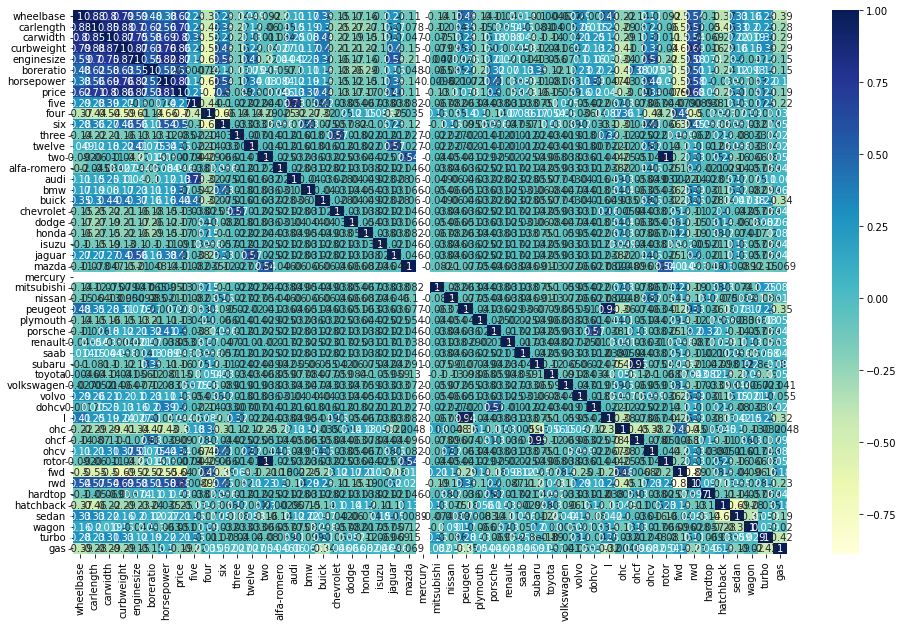

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [18]:
y_train = df_train.pop('price')
X_train = df_train

In [22]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 14),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('alfa-romero', False, 19),
 ('audi', False, 7),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 21),
 ('dodge', False, 13),
 ('honda', False, 9),
 ('isuzu', False, 3),
 ('jaguar', True, 1),
 ('mazda', False, 20),
 ('mercury', False, 26),
 ('mitsubishi', False, 6),
 ('nissan', False, 11),
 ('peugeot', True, 1),
 ('plymouth', False, 18),
 ('porsche', True, 1),
 ('renault', False, 5),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', False, 24),
 ('volkswagen', False, 23),
 ('volvo', True, 1),
 ('dohcv', False, 15),
 ('l', False, 2),
 ('ohc', False, 17),
 ('ohcf', True, 1),
 ('ohcv', False, 16),
 ('rotor', True, 1),
 ('fwd', False, 25),
 ('rwd', False, 10),
 ('hardtop', Tr

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'five', 'four', 'three', 'twelve', 'two', 'bmw', 'buick', 'jaguar',
       'peugeot', 'porsche', 'saab', 'subaru', 'volvo', 'ohcf', 'rotor',
       'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [25]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [26]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [27]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [28]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           5.76e-67
Time:                        07:03:54   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -417.5
Df Residuals:                     119   BIC:                            -346.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0962      0.061     -1.585      0.1

In [30]:
X_train_rfe= X_train_rfe.drop(['three','two','peugeot','rotor','saab','subaru','buick'], axis = 1)

In [31]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.71
2,curbweight,13.21
16,sedan,10.57
15,hatchback,9.73
3,enginesize,8.62
1,carwidth,6.14
17,wagon,5.70
5,horsepower,5.45
4,boreratio,3.92
7,four,3.34


In [34]:
# Dropping sedan as VIF value is high.
top10=['const','five','bmw','carwidth','curbweight','enginesize','boreratio','horsepower','four','twelve']
X_train_rfe=X_train_rfe[top10]
X_train_rfe.head()

,const,five,bmw,carwidth,curbweight,enginesize,boreratio,horsepower,four,twelve
122,1.0,0,0,0.291667,0.272692,0.139623,0.230159,0.083333,1,0
125,1.0,0,0,0.666667,0.500388,0.339623,1.000000,0.395833,1,0
166,1.0,0,0,0.308333,0.314973,0.139623,0.444444,0.266667,1,0
1,1.0,0,0,0.316667,0.411171,0.260377,0.626984,0.262500,1,0
199,1.0,0,0,0.575000,0.647401,0.260377,0.746032,0.475000,1,0


In [35]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.53
4,curbweight,8.11
5,enginesize,6.60
3,carwidth,5.03
7,horsepower,4.09
8,four,3.09
6,boreratio,2.19
1,five,1.65
9,twelve,1.43
2,bmw,1.18


In [36]:
# Dropping sedan as using VIF value.
X_train1= X_train_rfe.drop(["bmw"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.93e-56
Time:                        07:08:34   Log-Likelihood:                 167.69
No. Observations:                 143   AIC:                            -315.4
Df Residuals:                     133   BIC:                            -285.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0901      0.033     -2.747      0.0

In [37]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.40
3,curbweight,8.10
4,enginesize,6.45
2,carwidth,4.98
6,horsepower,4.06
7,four,2.90
5,boreratio,2.17
1,five,1.61
8,twelve,1.41


In [39]:
# Dropping wagon as vif value is high.
X_train1= X_train1.drop(["curbweight"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           7.64e-52
Time:                        07:10:47   Log-Likelihood:                 148.54
No. Observations:                 143   AIC:                            -283.1
Df Residuals:                     136   BIC:                            -262.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0412      0.036     -1.155      0.2

In [40]:
# Dropping wagon as p value is high.
X_train1= X_train1.drop(["five"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     145.1
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           6.17e-53
Time:                        07:11:14   Log-Likelihood:                 148.51
No. Observations:                 143   AIC:                            -285.0
Df Residuals:                     137   BIC:                            -267.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0428      0.035     -1.227      0.2

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.66
2,enginesize,3.98
4,horsepower,3.77
1,carwidth,2.77
5,four,2.26
3,boreratio,1.94


In [42]:
#dropping based on vif value
X_train1= X_train1.drop(["boreratio"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     178.5
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.64e-53
Time:                        07:11:48   Log-Likelihood:                 147.12
No. Observations:                 143   AIC:                            -284.2
Df Residuals:                     138   BIC:                            -269.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0470      0.035     -1.344      0.1

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.54
2,enginesize,3.89
3,horsepower,3.52
1,carwidth,2.42
4,four,1.85


In [44]:
#dropping based on vif value
X_train1 = X_train1.drop(["four"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.63e-51
Time:                        07:14:16   Log-Likelihood:                 138.98
No. Observations:                 143   AIC:                            -270.0
Df Residuals:                     139   BIC:                            -258.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1631      0.021     -7.619      0.0

In [45]:
y_train_price = lm.predict(X_train_lm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

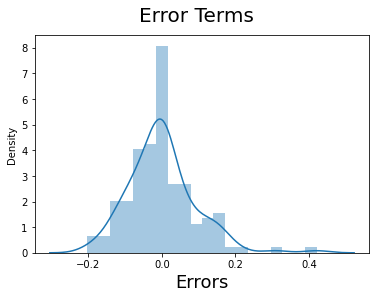

In [46]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [47]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
y_test = df_test.pop('price')
X_test = df_test

In [49]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [50]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [51]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.06601535516333346

Text(0, 0.5, 'y_pred')

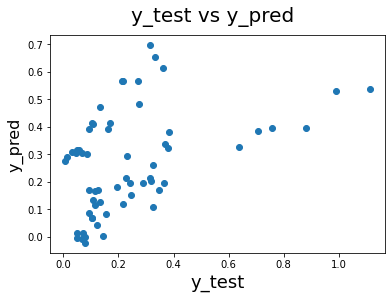

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 